In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D     #to create a downsampled (pooled) feature map
from keras.layers import Convolution2D    #a technique used in image processing and reduces the dimensions of the input matrix. multiplication (dot product) of weights with the input i.e., between an array of input data and a 2D array of weights known as filter or kernel

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import utils

import random
import os
import cv2

from tensorflow.keras.callbacks import EarlyStopping      #EarlyStopping allows us to specify a large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset. It prevent overfitting of the model, and saving resources
from tensorflow.keras.callbacks import ReduceLROnPlateau    #ReduceLROnPlateau is a callback to reduce the learning rate when a metric has stopped improving

In [86]:
# from google.colab import drive
# drive.mount('/content/drive')

In [87]:
Fast_Run = False
Image_Width = 128
Image_Height = 128
Image_Size = (Image_Width, Image_Height)
Image_Channels =3

In [88]:
filenames = os.listdir('/content/drive/MyDrive/data science /train CNN')
categories = []

for file in filenames:
  category = file.split('.')[0]
  if category == 'dog':
    categories.append(1)
  else:
    categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [89]:
df.shape

(402, 2)

In [90]:
df['category'].value_counts()

0    201
1    201
Name: category, dtype: int64

In [91]:
df.head()

,filename,category
0,cat.90.jpg,0
1,cat.77.jpg,0
2,cat.37.jpg,0
3,cat.9.jpg,0
4,cat.97.jpg,0


In [92]:
df.tail()

,filename,category
397,dog.100.jpg,1
398,dog.156.jpg,1
399,dog.120.jpg,1
400,dog.188.jpg,1
401,dog.42.jpg,1


<Axes: >

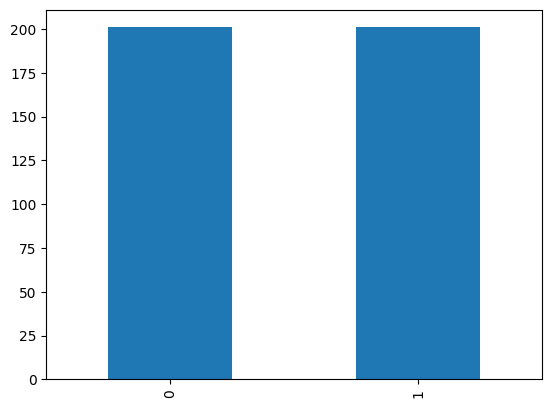

In [93]:
df['category'].value_counts().plot.bar()

Check Sampe Image

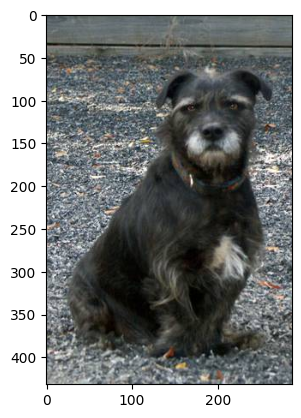

In [94]:
sample = random.choice(filenames)
img = load_img("/content/drive/MyDrive/data science /train CNN/"+sample)
plt.imshow(img)

* activation function help ANN learn complex patterns in the data or to add non-linearity into the neural network
* pooling provides spatial variance making the system capable of recognizing an object with some varied appearance. reduce the number of parameters and computations present in the network.Two types of operations in this layer; Average pooling and Maximum pooling.


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [96]:
model = Sequential()

model.add(Conv2D( 32, (3,3), activation='relu', input_shape=(Image_Width, Image_Height, Image_Channels)))
model.add( BatchNormalization())
model.add( MaxPooling2D(pool_size=(2,2 )))
model.add( Dropout(0.25))

model.add(Conv2D( 64, (3,3), activation='relu'))
model.add( BatchNormalization())
model.add( MaxPooling2D(pool_size=(2,2 )))
model.add( Dropout(0.25))

model.add(Conv2D( 128, (3,3), activation='relu'))
model.add( BatchNormalization())
model.add( MaxPooling2D(pool_size=(2,2 )))
model.add( Dropout(0.25))

In [97]:
model.add(Flatten( input_shape=[28,28] ))
model.add(Dense( 512, activation='relu' ))
model.add( BatchNormalization())
model.add( Dropout(0.5))
model.add(Dense( 2, activation='softmax' ))   # since 2 catrgory thus neurons=2

In [98]:
model.compile( loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'] )

In [99]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_12 (Ba  (None, 126, 126, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_13 (Ba  (None, 61, 61, 64)       

Improve Learning Rate

In [100]:
earlystop =EarlyStopping(patience=10)

learn_rate_reduction = ReduceLROnPlateau( monitor='val_accuracy', patience =2, verbose=1, factor=0.5, min_lr=0.00001)

callbacks = [earlystop, learn_rate_reduction]

Replacing back 0 and 1 to cat and dog respectively

In [101]:
df['category'] = df['category'].replace({0:'cat', 1:'dog'})

train_df, validate_df = train_test_split( df, test_size=0.2, random_state=42)
print(train_df.head(5))
print(validate_df.head(5))
train_df = train_df.reset_index( drop=True)
validate_df = validate_df.reset_index( drop=True)
print(train_df.head(5))
print(validate_df.head(5))

        filename category
18     cat.8.jpg      cat
203   dog.96.jpg      dog
351  dog.121.jpg      dog
275    dog.4.jpg      dog
63    cat.66.jpg      cat
        filename category
285   dog.49.jpg      dog
281  cat.124.jpg      cat
33    cat.71.jpg      cat
211   dog.97.jpg      dog
93    cat.91.jpg      cat
      filename category
0    cat.8.jpg      cat
1   dog.96.jpg      dog
2  dog.121.jpg      dog
3    dog.4.jpg      dog
4   cat.66.jpg      cat
      filename category
0   dog.49.jpg      dog
1  cat.124.jpg      cat
2   cat.71.jpg      cat
3   dog.97.jpg      dog
4   cat.91.jpg      cat


In [102]:
train_df['category'].value_counts()

dog    166
cat    155
Name: category, dtype: int64

<Axes: >

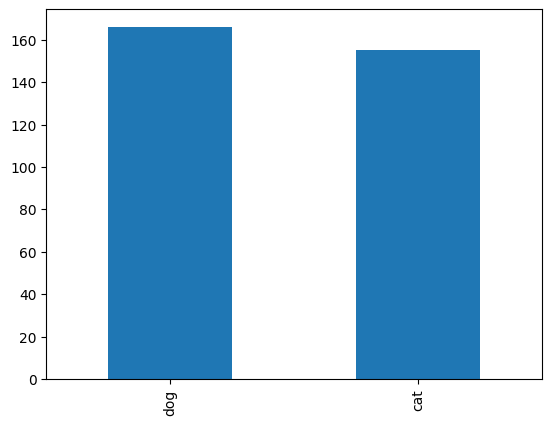

In [103]:
train_df['category'].value_counts().plot.bar()

In [104]:
validate_df['category'].value_counts()

cat    46
dog    35
Name: category, dtype: int64

<Axes: >

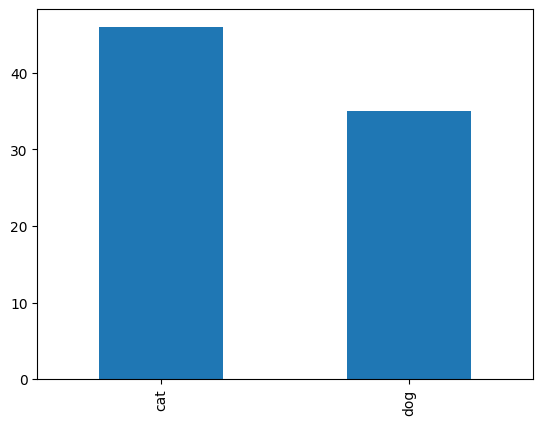

In [105]:
validate_df['category'].value_counts().plot.bar()

In [106]:
total_train = train_df.shape[0]
print(total_train)
total_validate = validate_df.shape[0]
print(total_validate)
batch_size=15

321
81


Training Generator to create more data for model to perform well

the Keras ImageDataGenerator class to augment our images. It is a method of applying different kinds of transformation to original images resulting in multiple transformed copies of the same image

need a way turn our images into batches of data arrays in memory so that they can be fed to the network during training. ImageDataGenerator can readily be used for this purpose.

So, we import this class and create an instance of the generator. We are using Keras to retrieve images from the disk with the flow_from_directory or dataframe method of the ImageDataGenerator class.

In [107]:
train_datagen = ImageDataGenerator(rotation_range=15, rescale=1./255 , shear_range=0.1,zoom_range=0.2, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

train_generator = train_datagen.flow_from_dataframe(train_df, "/content/drive/MyDrive/data science /train CNN", x_col="filename" , y_col="category" , target_size=Image_Size, batch_size=batch_size, class_mode='categorical')


Found 321 validated image filenames belonging to 2 classes.


Validation Generator

In [108]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df, "/content/drive/MyDrive/data science /train CNN", x_col="filename" , y_col="category" , target_size=Image_Size, batch_size=batch_size, class_mode='categorical')


Found 81 validated image filenames belonging to 2 classes.


See how generator works

In [109]:
ex_df = train_df.sample(n=1).reset_index(drop=True)
ex_generator = train_datagen.flow_from_dataframe(ex_df, "/content/drive/MyDrive/data science /train CNN", x_col = 'filename',y_col ='category', target_size=Image_Size,class_mode='categorical')

Found 1 validated image filenames belonging to 1 classes.


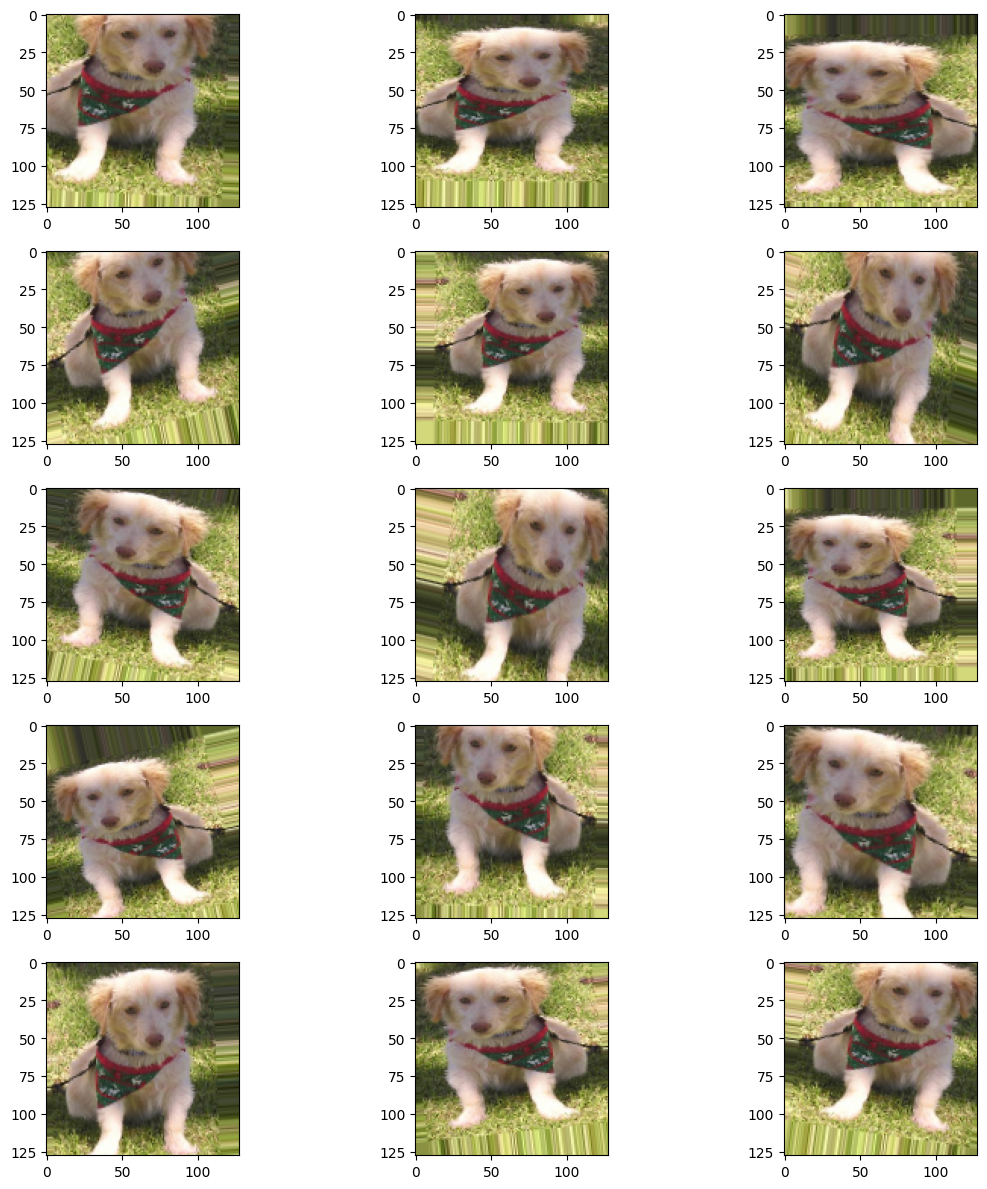

In [110]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for x_batch, y_batch in ex_generator:
    img = x_batch[0]
    plt.imshow(img)
    break
plt.tight_layout()
plt.show()

Fit Model

In [114]:
epochs = 3 if Fast_Run else 50
history = model.fit( train_generator, epochs=epochs, validation_data=validation_generator, validation_steps=total_validate//batch_size, steps_per_epoch=total_train//batch_size, callbacks=callbacks )
model.save('model.h5')

Epoch 1/50
21/21 [==============================] - 22s 1s/step - loss: 1.0357 - accuracy: 0.5915 - val_loss: 3.0862 - val_accuracy: 0.5733 - lr: 5.0000e-04
Epoch 2/50
21/21 [==============================] - 20s 945ms/step - loss: 0.8550 - accuracy: 0.6078 - val_loss: 2.2243 - val_accuracy: 0.5733 - lr: 5.0000e-04
Epoch 3/50
21/21 [==============================] - ETA: 0s - loss: 0.8865 - accuracy: 0.6405
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
21/21 [==============================] - 22s 1s/step - loss: 0.8865 - accuracy: 0.6405 - val_loss: 4.3382 - val_accuracy: 0.5467 - lr: 5.0000e-04
Epoch 4/50
21/21 [==============================] - 20s 976ms/step - loss: 0.7416 - accuracy: 0.6993 - val_loss: 1.8131 - val_accuracy: 0.5467 - lr: 2.5000e-04
Epoch 5/50
21/21 [==============================] - ETA: 0s - loss: 0.6983 - accuracy: 0.6471
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
21/21 [==============================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Visualize Training

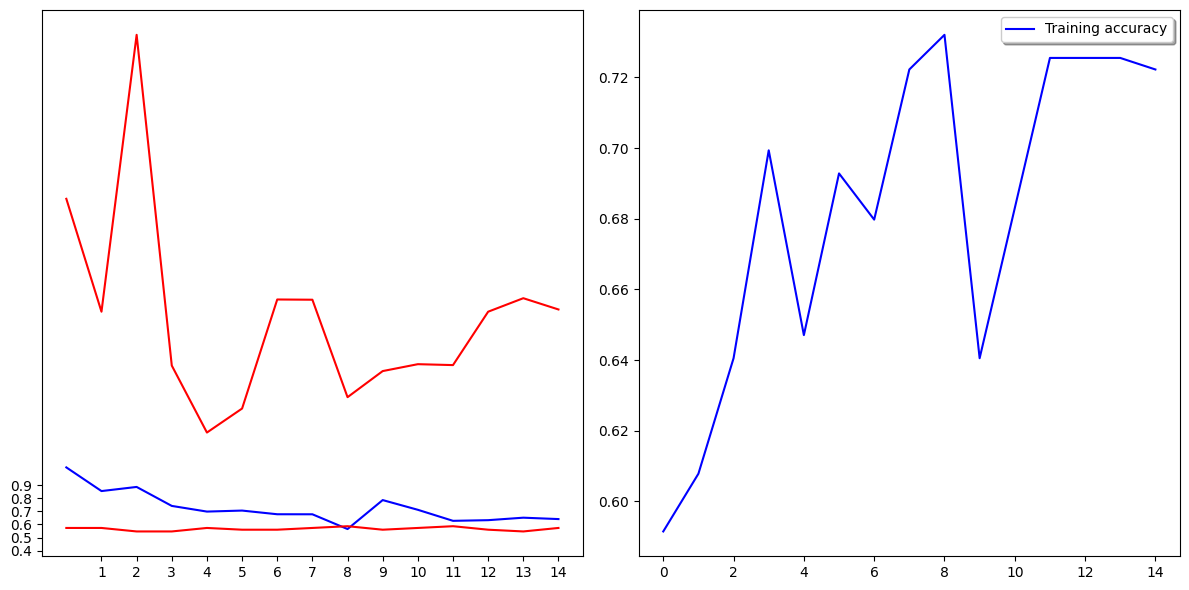

In [115]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.plot(history.history['loss'], color='b', label='Training loss')
ax1.plot(history.history['val_loss'], color='r', label='validation_loss')
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0,1,0.1))

ax2.plot(history.history['accuracy'], color='b', label='Training accuracy')
ax1.plot(history.history['val_accuracy'], color='r', label='validation_accuracy')

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 33ms/step
dog
1/1 [==============================] - 0s 36ms/step
dog
1/1 [==============================] - 0s 37ms/step
cat
1/1 [==============================] - 0s 37ms/step
dog
1/1 [==============================] - 0s 38ms/step
dog
1/1 [==============================] - 0s 34ms/step
dog
1/1 [==============================] - 0s 35ms/step
dog
1/1 [==============================] - 0s 38ms/step
dog
1/1 [==============================] - 0s 36ms/step
cat
1/1 [==============================] - 0s 35ms/step
cat


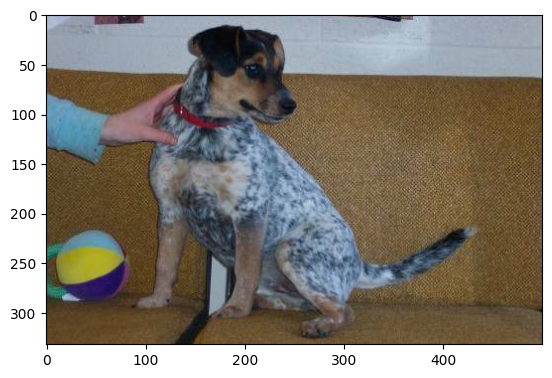

In [116]:
for i in range(10):
  all_test_images = os.listdir( "/content/drive/MyDrive/data science /test CNN" )
  random_image = random.choice(all_test_images)
  sample_img = load_img("/content/drive/MyDrive/data science /test CNN/"+random_image)
  plt.imshow(sample_img)
  img = cv2.imread(f'/content/drive/MyDrive/data science /test CNN/{random_image}')
  img = cv2.resize(img, (Image_Height, Image_Width))

  org= img.copy()
  img = img.reshape(1,128,128,3)

  pred = model.predict(img)
  print( ['cat','dog'][int(pred[0][0])])
  # cv2.imshow('Live predictions', org)
  # cv2.waitKey(0)
  # cv2.destroyAllWindows()

1/1 [==============================] - 0s 51ms/step
cat
1/1 [==============================] - 0s 52ms/step
dog
1/1 [==============================] - 0s 55ms/step
dog
1/1 [==============================] - 0s 49ms/step
cat
1/1 [==============================] - 0s 58ms/step
dog
1/1 [==============================] - 0s 53ms/step
cat
1/1 [==============================] - 0s 53ms/step
dog
1/1 [==============================] - 0s 52ms/step
dog
1/1 [==============================] - 0s 55ms/step
dog
1/1 [==============================] - 0s 52ms/step
dog


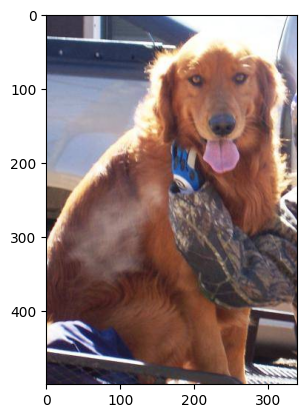

In [123]:
for i in range(10):
  all_test_images = os.listdir( "/content/drive/MyDrive/data science /test CNN" )
  random_image = random.choice(all_test_images)
  sample_img = load_img("/content/drive/MyDrive/data science /test CNN/"+random_image)
  plt.imshow(sample_img)
  img = cv2.imread(f'/content/drive/MyDrive/data science /test CNN/{random_image}')
  img = cv2.resize(img, (Image_Height, Image_Width))

  org= img.copy()
  img = img.reshape(1,128,128,3)

  pred = model.predict(img)
  print( ['cat','dog'][int(pred[0][0])])